In [236]:
#Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns


In [237]:
#Loading the downloaded CSV file of the generated dataset
Df= pd.read_csv(r'C:/Users/MUGURE/Downloads/MOCK_DATA.csv')

In [238]:
#Dropping some columns that will not be in use for this project
Df.drop(['subscriber_id','first_name','email','subscription_start_date'],axis=1, inplace= True)

In [240]:
Df.head()

,age,country,active_status,Gender
0,52,Canada,inactive,Female
1,50,United States,inactive,Female
2,61,United States,active,Male
3,48,United States,active,Male
4,71,United States,active,Male


In [241]:
Df.dtypes

age               int64
country          object
active_status    object
Gender           object
dtype: object

In [242]:
#Converting the object values to categories for proper analysis
cols= ['Gender','active_status','country']
Df[cols]= Df[cols].astype('category')


In [243]:
Df.dtypes

age                 int64
country          category
active_status    category
Gender           category
dtype: object

C:\Users\MUGURE\AppData\Local\Temp\ipykernel_7804\938366840.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Deck= Df.groupby(['country','active_status']).active_status.count().unstack()


active_status   active  inactive
country                         
Canada             170       180
United Kingdom      27        20
United States      302       301


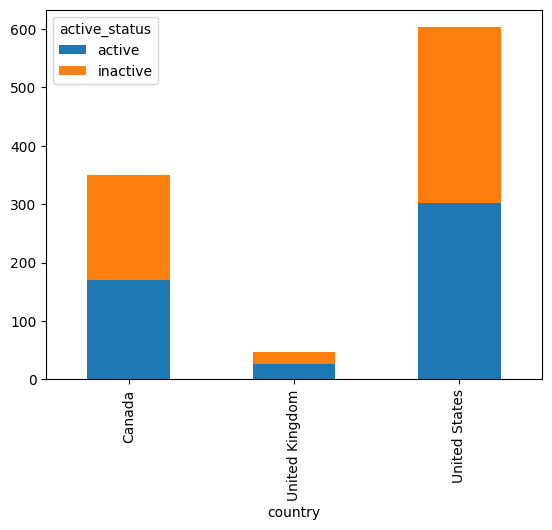

In [244]:
#Checking if country has any effect on customer churn by trying to find the relationship between individual columns and output
Deck= Df.groupby(['country','active_status']).active_status.count().unstack()
Deck.plot(kind='bar', stacked= True)
print(Deck)

In [ ]:
#The numbers above show that Canada has 51% of the Canadian consumers leave the organization, while the number of United Kingdom is 43% and United States is 50%. This clearly indictaes the Canadian consumers have a higher rate of leaving as compared to the other countries.

C:\Users\MUGURE\AppData\Local\Temp\ipykernel_7804\4075663040.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Client= Df.groupby(['Gender','active_status']).active_status.count().unstack()


active_status  active  inactive
Gender                         
Female            233       272
Male              266       229


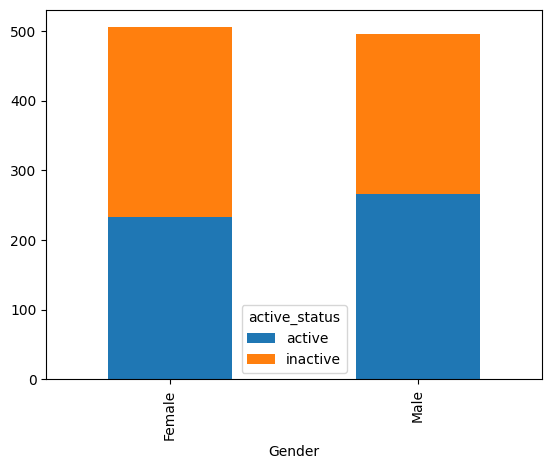

In [245]:
Client= Df.groupby(['Gender','active_status']).active_status.count().unstack()
Client.plot(kind= 'bar',stacked= True)
print(Client)

In [ ]:
#The numbers in this relationship shows that 54% of female consumers are likely to leave and 41% of male consumers. This showers the rate of female consumers leaving is higher than male consumers.

In [246]:
#Converting categorical data to numerical data using the one hot encoding
one= pd.get_dummies(Df['Gender'])
one2= pd.get_dummies(Df['active_status'])
one3= pd.get_dummies(Df['country'])

In [247]:
Df= Df.drop(['Gender','active_status','country'],axis=1)

In [248]:
Df= Df.join(one)
Df= Df.join(one2)
Df= Df.join(one3)
Df.replace({False:0, True:1}, inplace= True)
Df.head()

,age,Female,Male,active,inactive,Canada,United Kingdom,United States
0,52,1,0,0,1,1,0,0
1,50,1,0,0,1,0,0,1
2,61,0,1,1,0,0,0,1
3,48,0,1,1,0,0,0,1
4,71,0,1,1,0,0,0,1


In [249]:
#Dividing the data into training and test sets
dataset_features= Df.drop(['inactive'], axis=1)
dataset_labels= Df['inactive']

In [250]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels= train_test_split(dataset_features, dataset_labels, test_size= 0.2, random_state= 21)

In [253]:
#Using the Support Vector Machines(SVM) to train the model:
from sklearn.svm import SVC as svc
svc_object= svc(kernel='rbf', degree=8)
svc_object.fit(train_features, train_labels)
predicted_labels= svc_object.predict(test_features)


In [254]:
#Evaluating the perfomance of the SVM model:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(test_labels, predicted_labels))
print(confusion_matrix(test_labels, predicted_labels))
print(accuracy_score(test_labels,predicted_labels))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       111
           1       0.45      1.00      0.62        89

    accuracy                           0.45       200
   macro avg       0.22      0.50      0.31       200
weighted avg       0.20      0.45      0.27       200

[[  0 111]
 [  0  89]]
0.445


C:\Users\MUGURE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MUGURE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MUGURE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1

In [ ]:
#This shows SVM has an accuracy of 44.5%

In [255]:
#Using Random Forest Classifier:
from sklearn.ensemble import RandomForestClassifier as rfc
rfc_object= rfc(n_estimators= 200, random_state=0)
rfc_object.fit(train_features, train_labels)
predicted_labels2= rfc_object.predict(test_features)

In [256]:
print(classification_report(test_labels,predicted_labels2))
print(confusion_matrix(test_labels, predicted_labels2))
print(accuracy_score(test_labels, predicted_labels2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        89

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

[[111   0]
 [  0  89]]
1.0


In [ ]:
#The RFC achieves an 100% accuracy for customer churn prediction.

In [ ]:
#This shows that the Random Forest algorithm performs best with an accuracy of 100%